# Gerekli kütüphaneleri içe aktar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install fpdf
import os
from fpdf import FPDF

# Titanic veri setini URL'den yükle


In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

In [ ]:
df = pd.read_csv(url)

# İlk 10 satırı görüntüle

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Veri tipi ve boş değerler hakkında bilgi al

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Sayısal sütunların özet istatistiklerini görüntüle

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Eksik verileri kontrol et


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Eksik yaş verilerini medyan ile doldur


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

# Eksik Embarked verilerini en sık görülen değerle doldur


In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Cabin sütununu kaldır


In [ ]:
df.drop(columns=['Cabin'], inplace=True)

# Güncel eksik veri kontrolü


In [ ]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# 'Survived', 'Sex' ve 'Pclass' sütunlarının değerlerini say


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


# Görselleştirme için klasör oluştur


In [ ]:
try:
  os.mkdir("Grafikler")
except:
  pass
mypath = "Grafikler"

# Veri dağılımını gösteren histogramlar oluştur

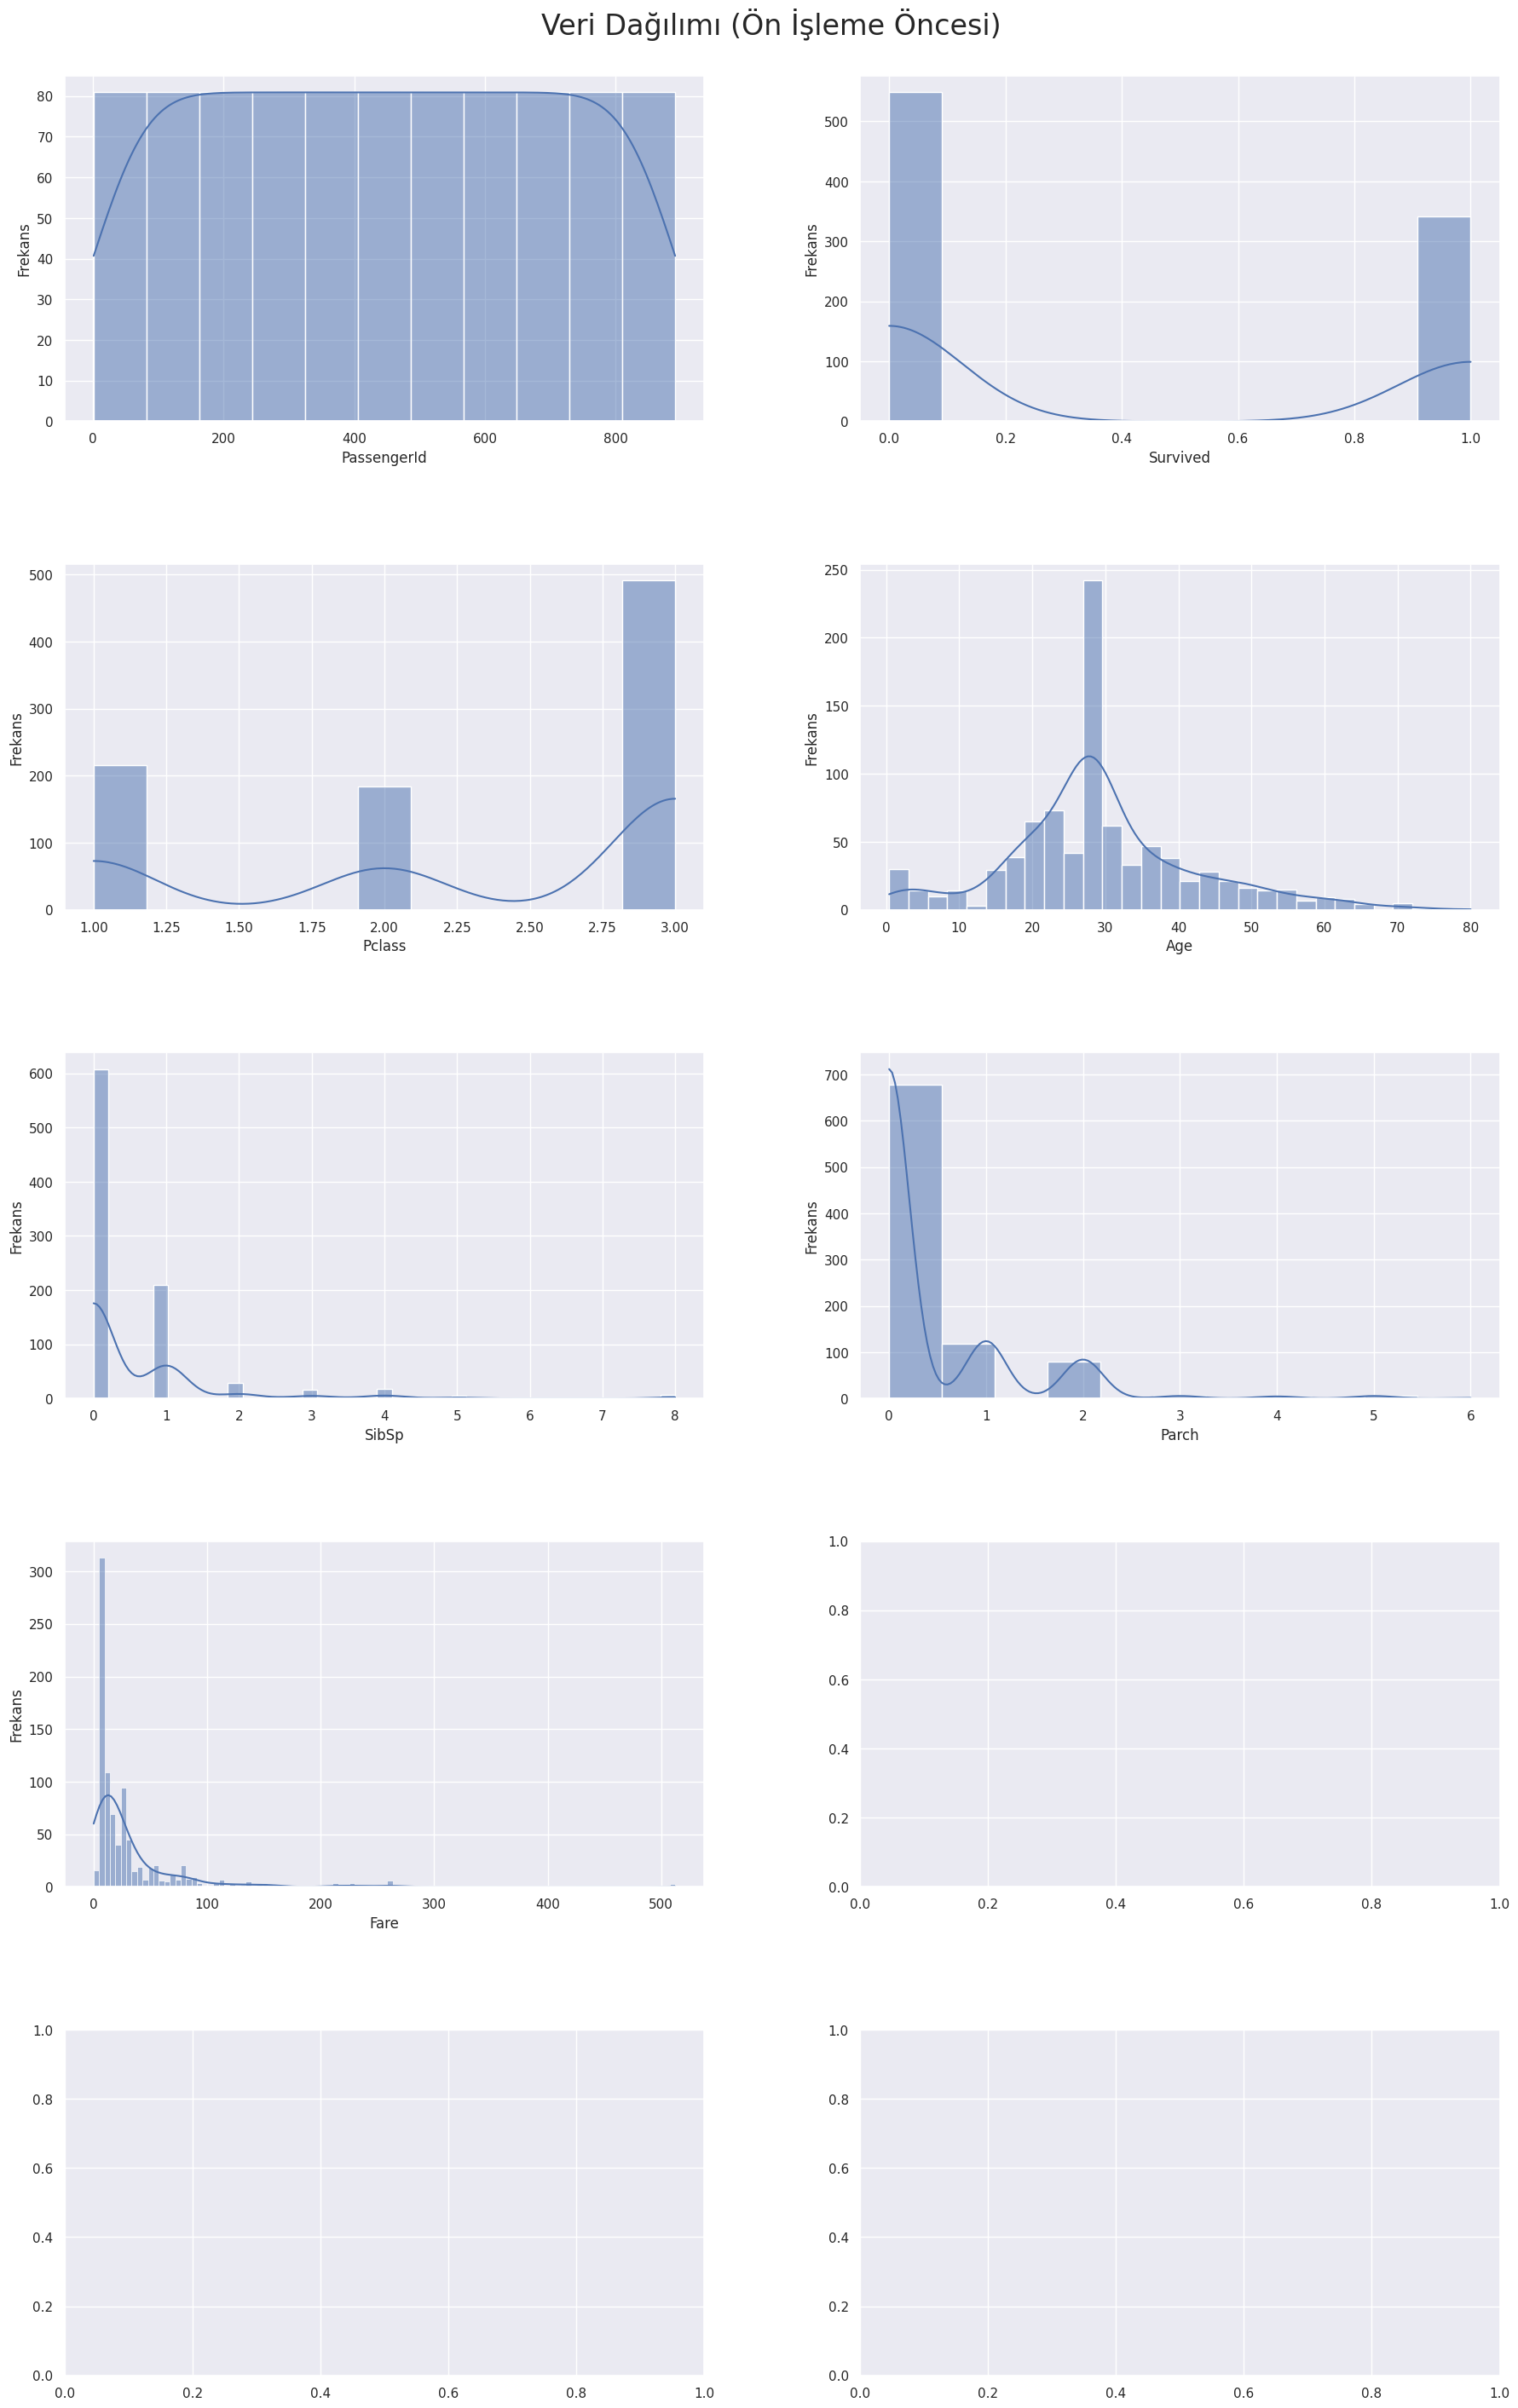

In [ ]:
f, axes = plt.subplots(5, 2, figsize=(20, 30))
f.tight_layout(pad=8)
f.suptitle("Veri Dağılımı (Ön İşleme Öncesi)", fontsize=24)

# Sayısal sütunları seç
sayısal_sütunlar = df.select_dtypes(exclude="object").columns
x_ekseni = 0
y_ekseni = 0

# Her sayısal sütun için histogramları çiz
for sütun in sayısal_sütunlar:
  sns.histplot(data=df, x=sütun, kde=True, ax=axes[x_ekseni, y_ekseni])
  axes[x_ekseni, y_ekseni].set_xlabel(sütun)
  axes[x_ekseni, y_ekseni].set_ylabel("Frekans")

# Eksen kontrolü
  if y_ekseni == 1:
    y_ekseni = 0
    x_ekseni += 1
  else:
    y_ekseni += 1


plt.savefig("Grafikler/dagilim_grafikleri.png")
plt.show()

# Sayısal veriler için boxplot grafikleri oluştur


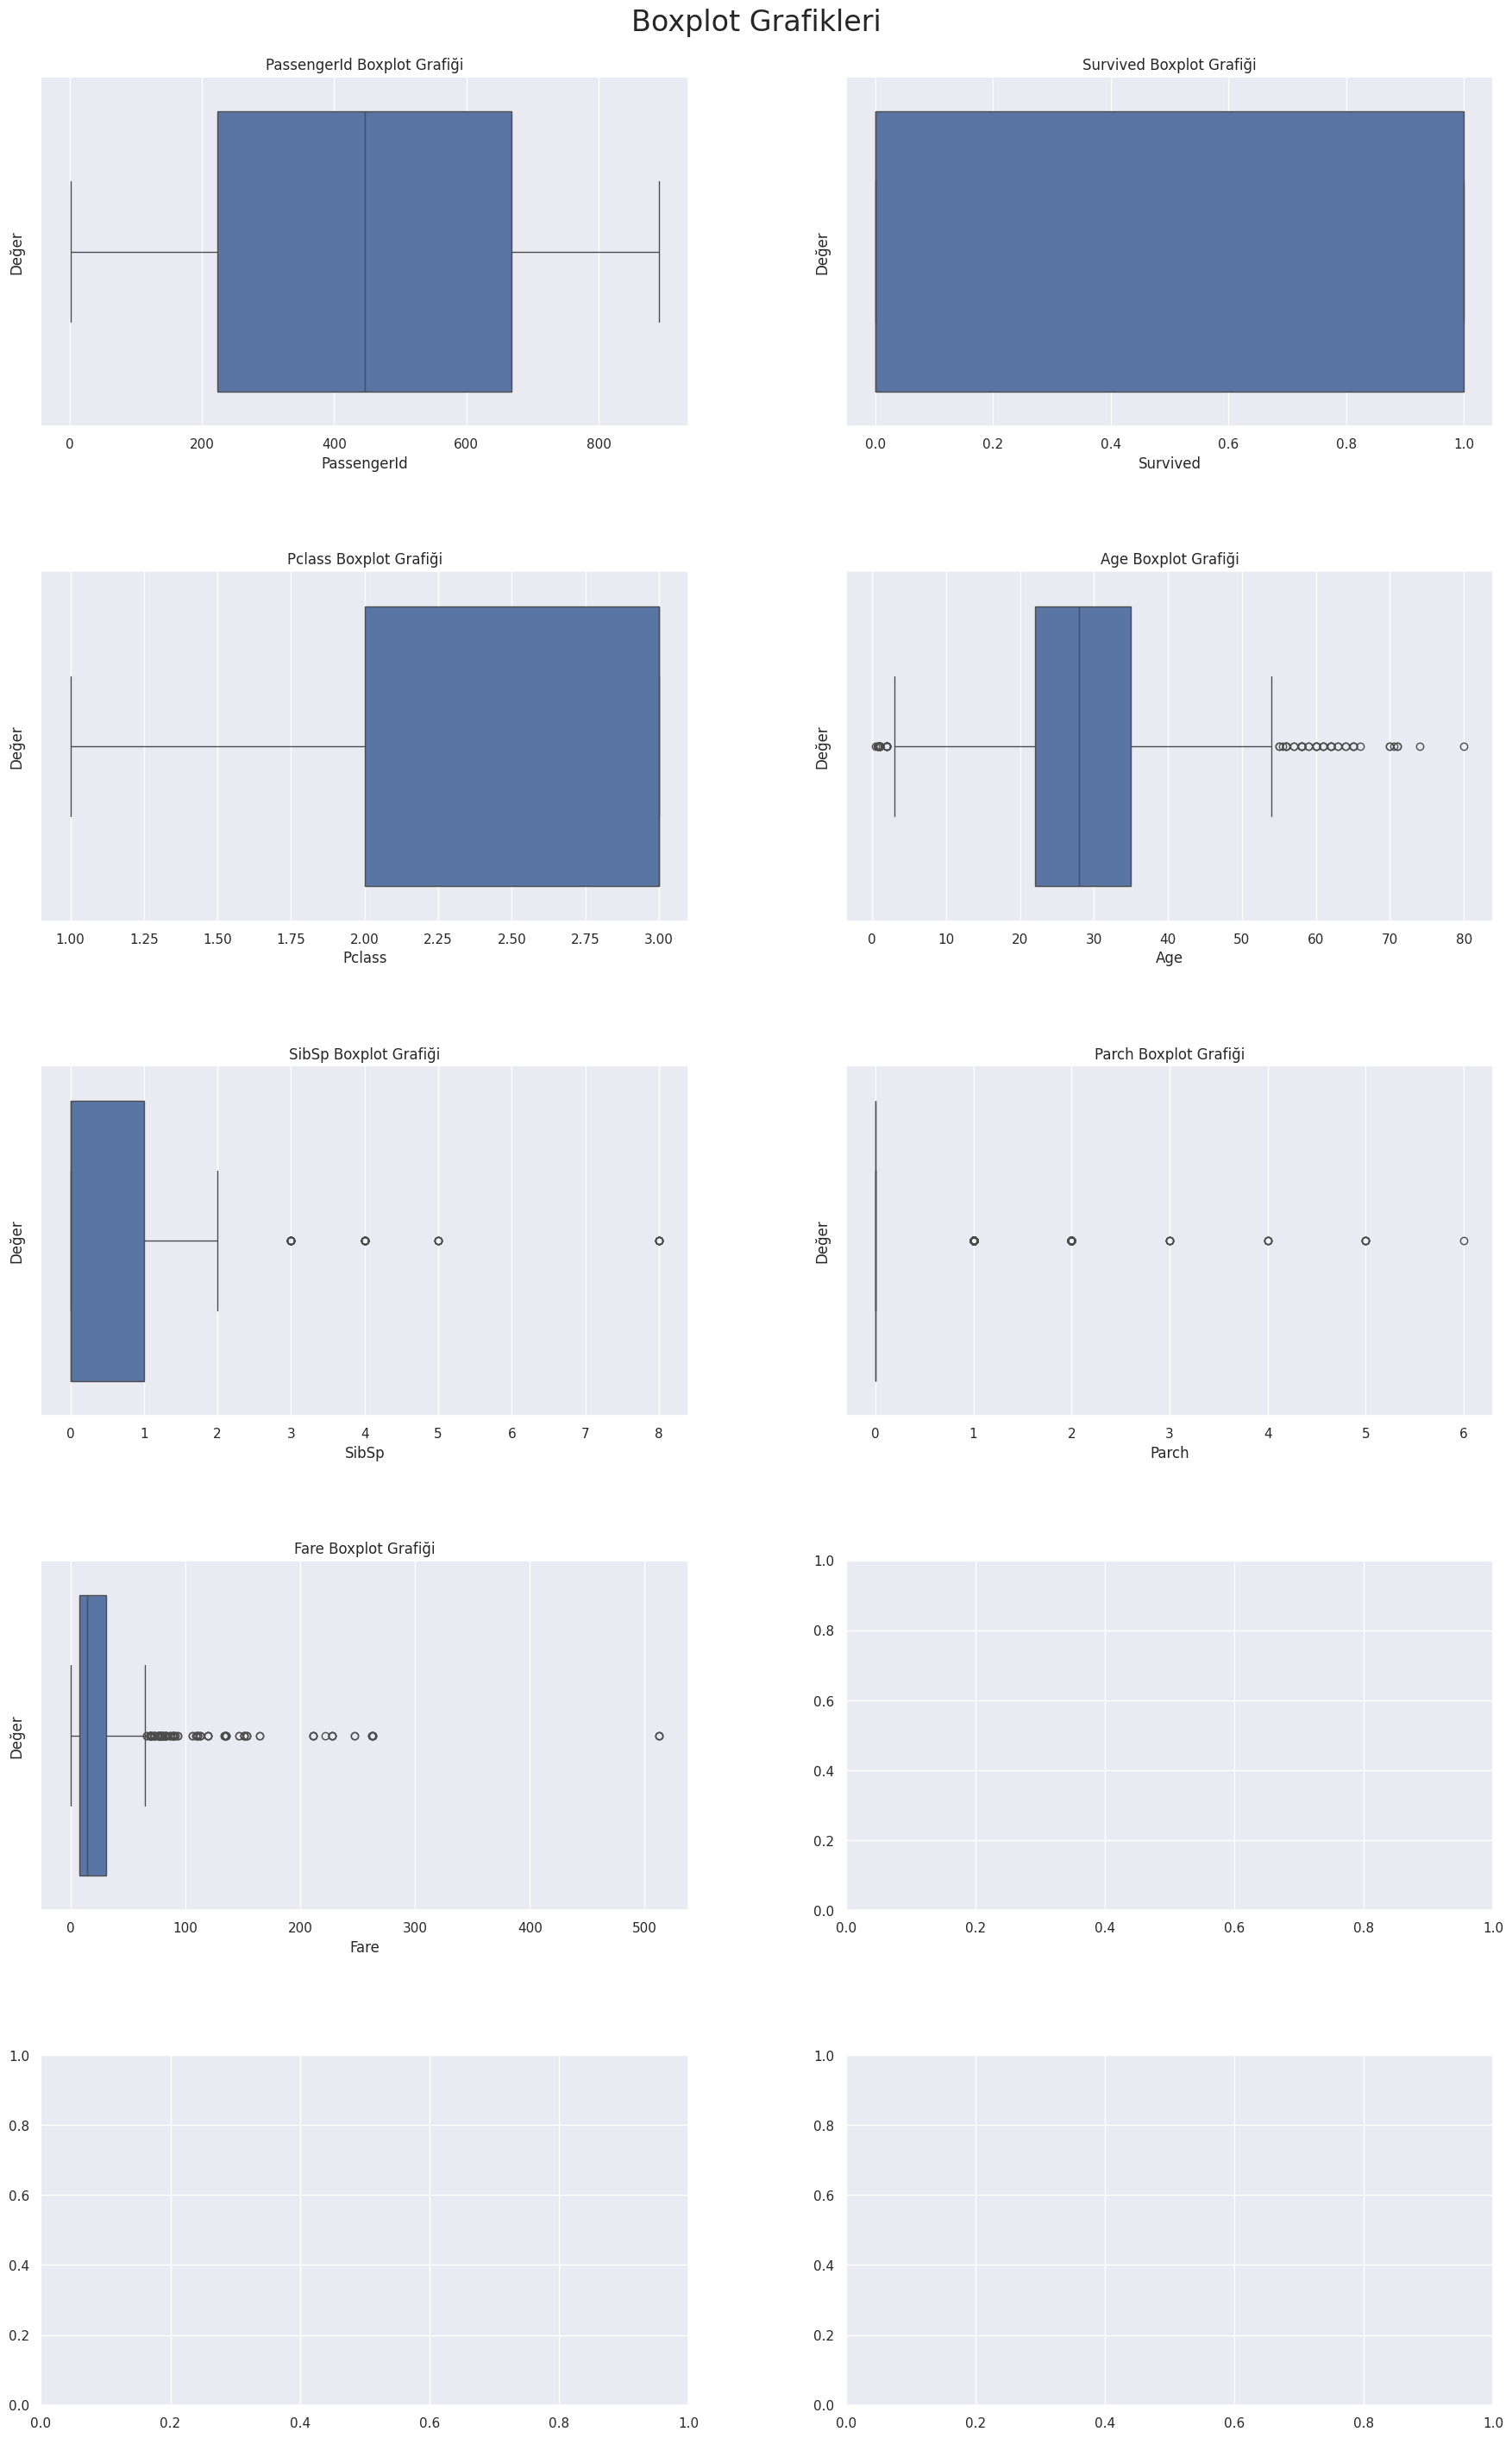

In [ ]:
f, axes = plt.subplots(5, 2, figsize=(20, 30))
f.tight_layout(pad=8)
f.suptitle("Boxplot Grafikleri", fontsize=24)

x_ekseni = 0
y_ekseni = 0

for sütun in sayısal_sütunlar:
    sns.boxplot(data=df, x=sütun, ax=axes[x_ekseni, y_ekseni])
    axes[x_ekseni, y_ekseni].set_xlabel(sütun)
    axes[x_ekseni, y_ekseni].set_ylabel("Değer")
    axes[x_ekseni, y_ekseni].set_title(f"{sütun} Boxplot Grafiği")

    if y_ekseni == 1:
        y_ekseni = 0
        x_ekseni += 1
    else:
        y_ekseni += 1

plt.savefig("Grafikler/boxplot_grafikleri.png")
plt.show()


# Sayısal veriler için korelasyon matrisi oluştur


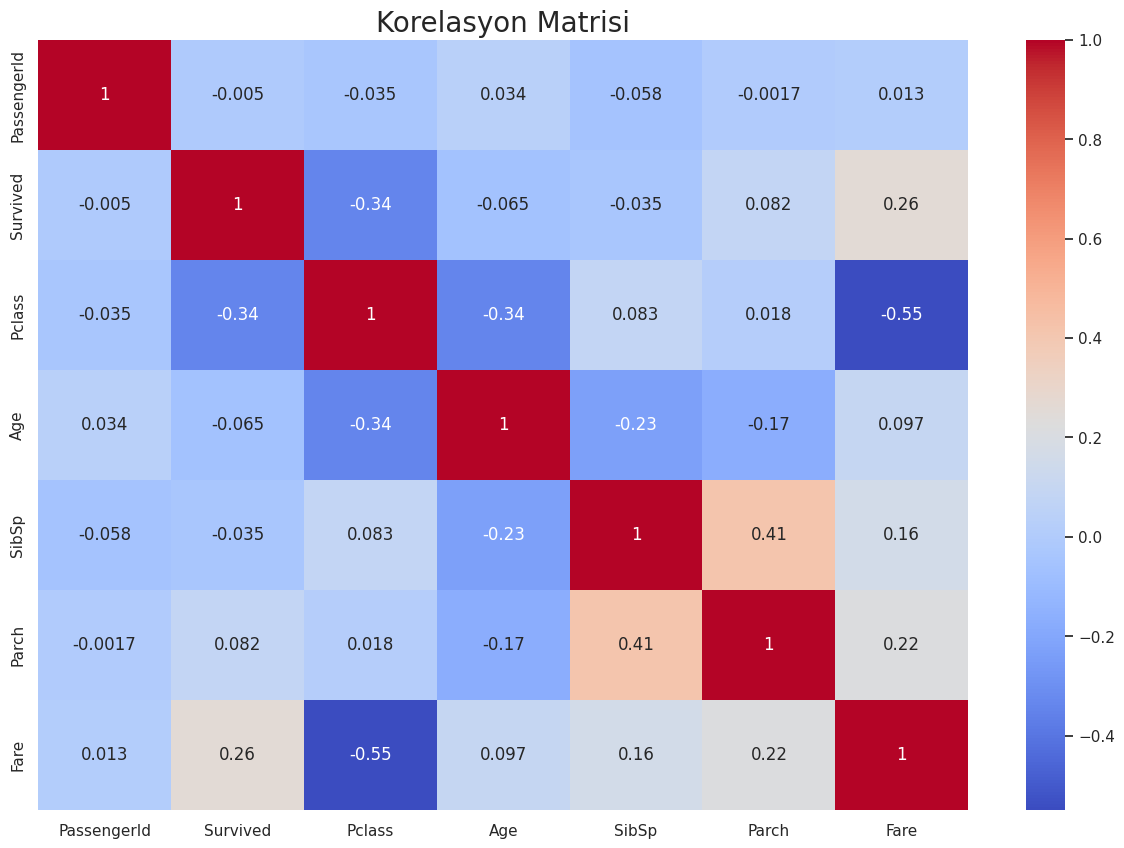

In [ ]:
sayisal_df = df.select_dtypes(include=["float64", "int64"])

sns.set(rc={'figure.figsize': (15, 10)})
plt.title("Korelasyon Matrisi", fontsize=20)
sns.heatmap(sayisal_df.corr(), annot=True, cmap="coolwarm")
plt.savefig("Grafikler/korelasyon_matrisi.png")
plt.show()


# Yaş ve Fare arasındaki ilişkiyi gösteren scatter plot


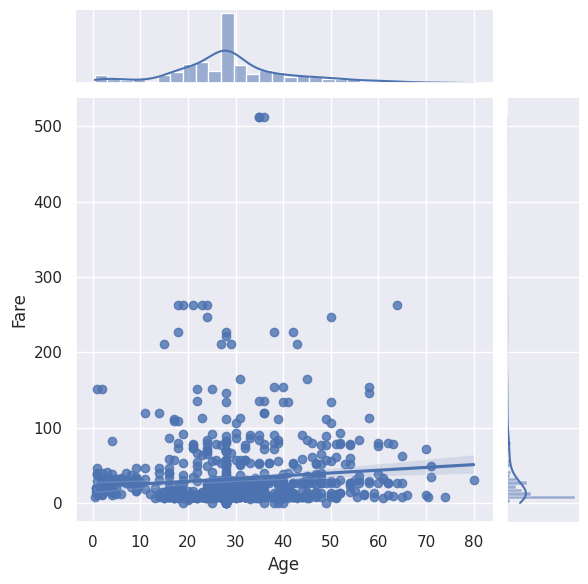

In [ ]:
sns.jointplot(data=df, x="Age", y="Fare", kind="reg")
plt.savefig("Grafikler/yas_ucret_iliskisi.png")
plt.show()

# Pclass ve Fare arasındaki ilişkiyi gösteren scatter plot


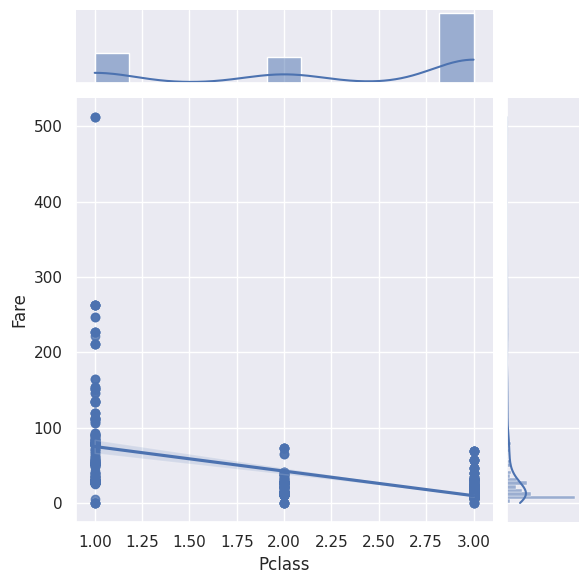

In [ ]:
sns.jointplot(data=df, x="Pclass", y="Fare", kind="reg")
plt.savefig("Grafikler/sinif_ucret_iliskisi.png")
plt.show()

# Grafikleri PDF'ye kaydetme işlemi
***zor***

çalışırken türkçe karakter kullandığım için, çok güzel bir hatayla karşılaştım, yeni bir yazı tipi indirmek yerine aşağıdaki kodu kullandım

In [ ]:
tüm_dosyalar = os.listdir("Grafikler/")  # Grafiklerin bulunduğu klasörden dosyaları al

# Grafik dosyalarının adlarında Türkçe karakterleri temizle
raporlar = [
    f"Grafikler/{dosya.replace('ğ', 'g').replace('ü', 'u').replace('ı', 'i').replace('ş', 's').replace('ç', 'c').replace('ö', 'o').replace('İ', 'I').replace('Ö', 'O').replace('Ç', 'C').replace('Ş', 'S').replace('Ğ', 'G')}"
    for dosya in tüm_dosyalar
]

In [ ]:
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", "B", 28)

başlık = "TITANIC VERISI RAPORU"
başlık = başlık.replace('İ', 'I').replace('ı', 'i').replace('Ğ', 'G').replace('ğ', 'g').replace('Ü', 'U').replace('ü', 'u').replace('Ş', 'S').replace('ş', 's').replace('Ö', 'O').replace('ö', 'o').replace('Ç', 'C').replace('ç', 'c')

pdf.cell(180, 20, txt=başlık, align='C')

In [ ]:
# Her bir raporu PDF'ye ekle
for rapor in raporlar:
    pdf.add_page()  # Yeni sayfa ekle
    pdf.set_font("Arial", "B", 20)

    rapor_baslik = os.path.basename(rapor)  # Dosya adını yoldan al
    rapor_baslik = rapor_baslik.replace('ğ', 'g').replace('ü', 'u').replace('ı', 'i').replace('ş', 's').replace('ç', 'c').replace('ö', 'o').replace('İ', 'I').replace('Ö', 'O').replace('Ç', 'C').replace('Ş', 'S').replace('Ğ', 'G')
    pdf.cell(180, 20, txt=rapor_baslik, align='C')  # Başlık ekle

    pdf.image(rapor, 5, 30, 200)  # Grafik ekle

pdf.output("titanic_data_report.pdf", "F")  # PDF dosyasını oluştur

''

# Cinsiyet bazında hayatta kalma durumu


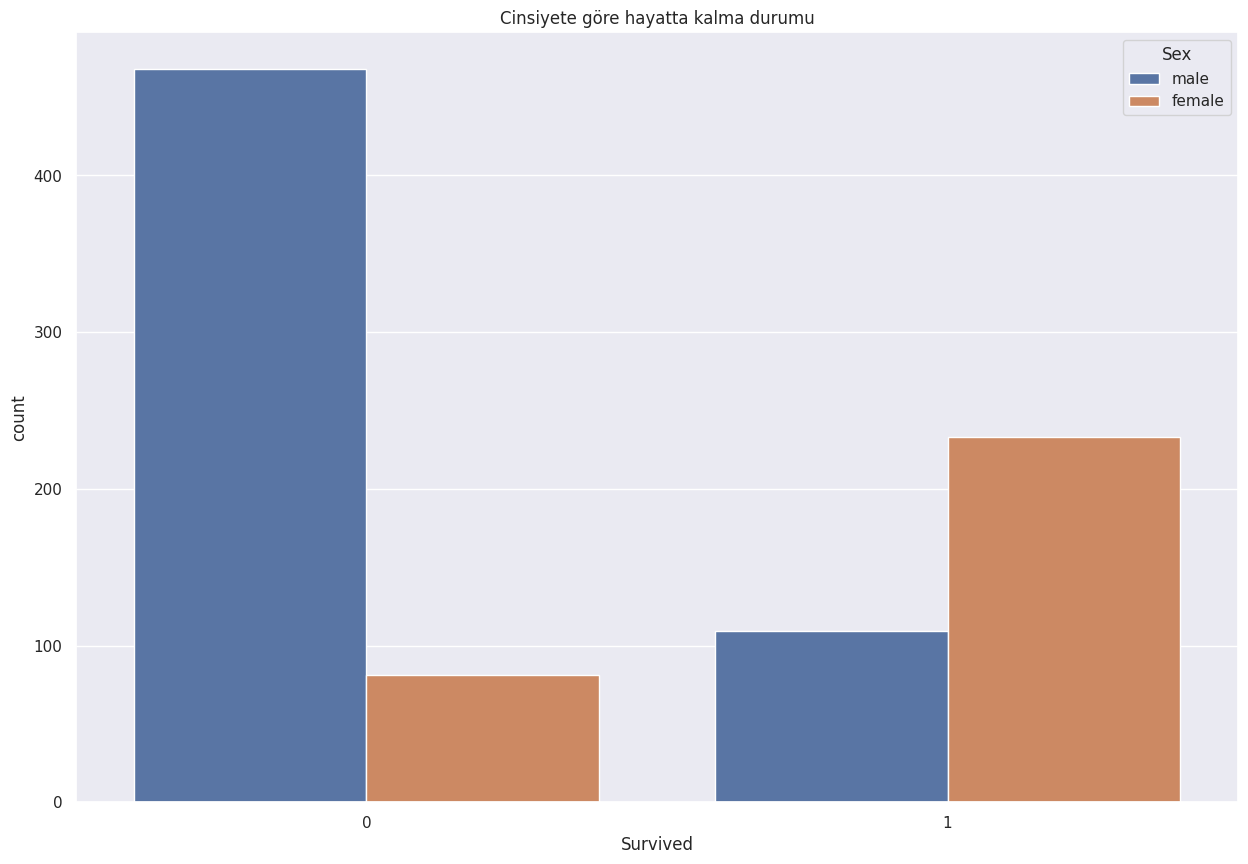

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Cinsiyete göre hayatta kalma durumu')
plt.show()

# Yaş Dağılımı


Text(0.5, 1.0, 'Yaş Dağalımı')

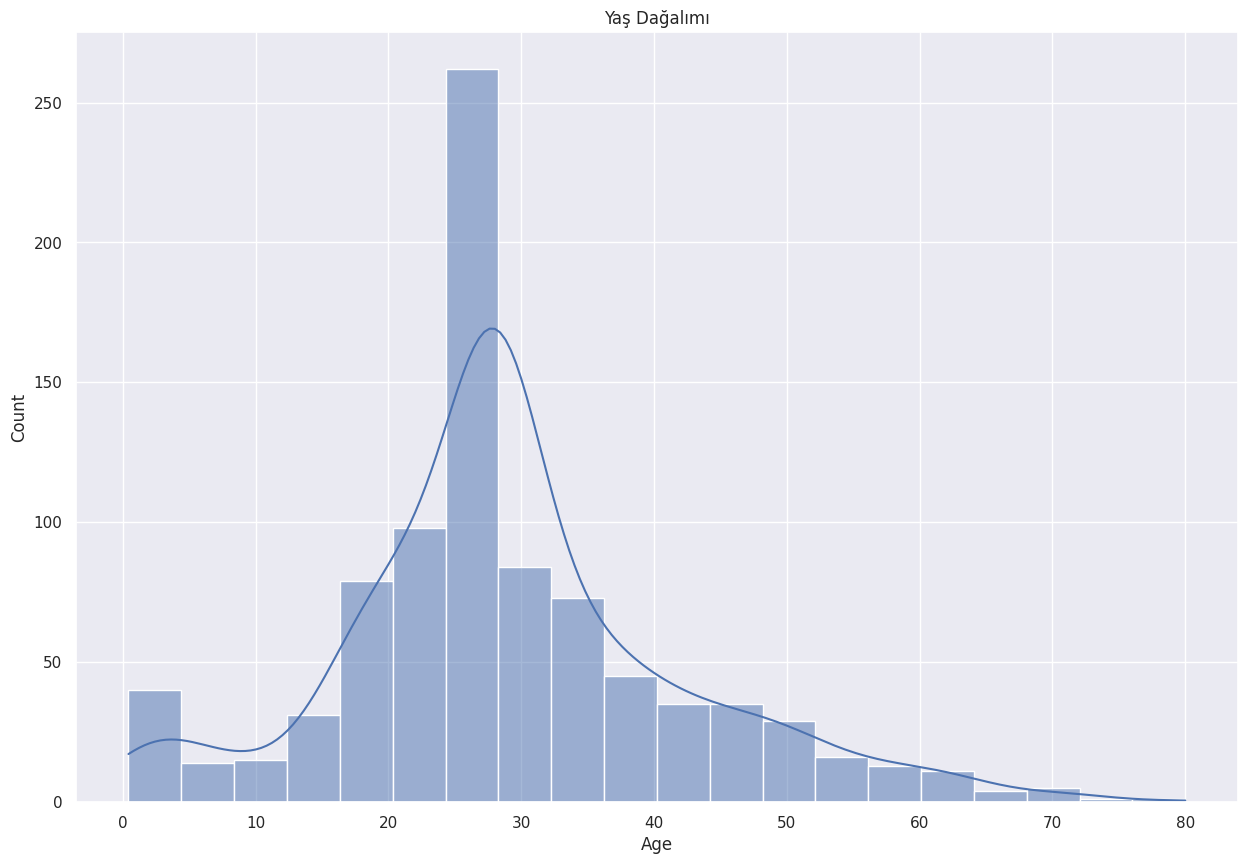

In [ ]:
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Yaş Dağalımı')

In [ ]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


# Bilet Fiyatı Dağılımı


Text(0.5, 1.0, 'Bilet Fiyat DAğalımı')

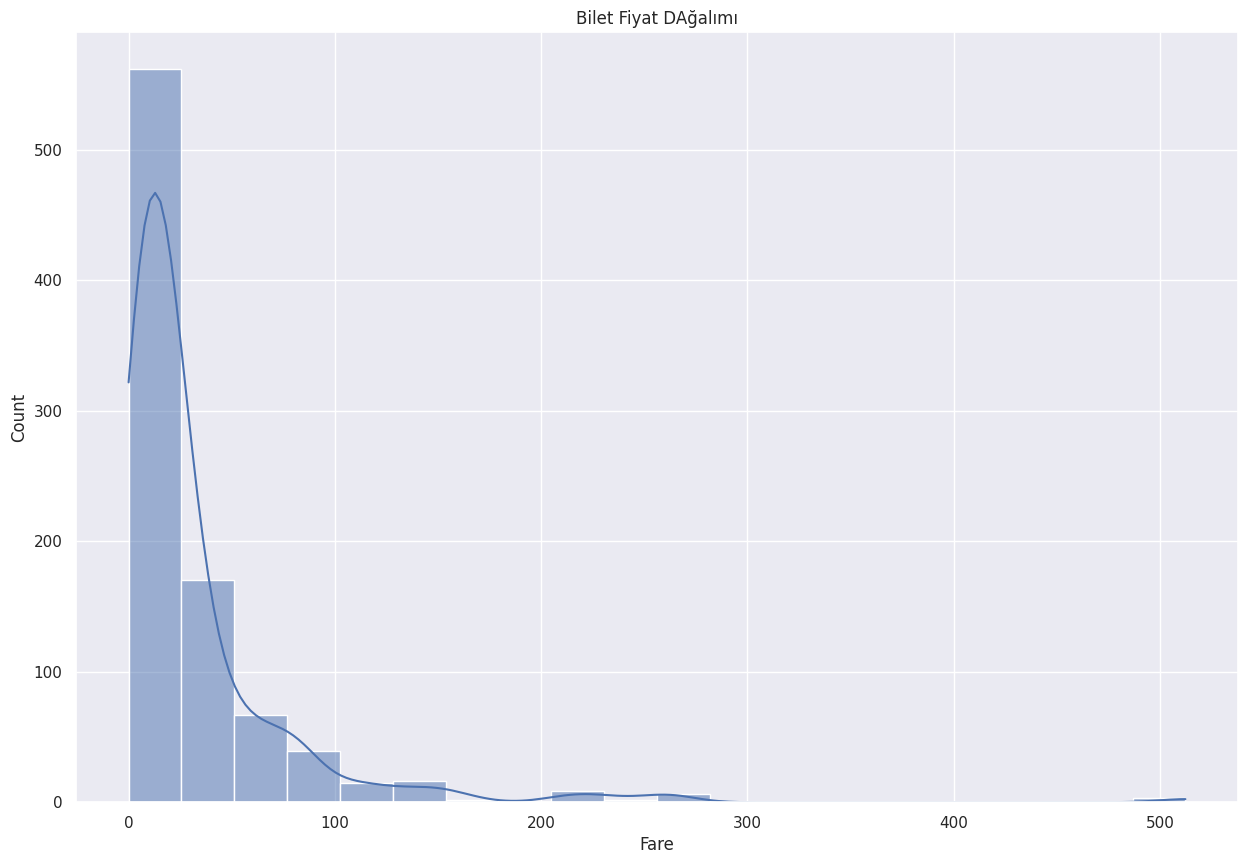

In [ ]:
sns.histplot(df['Fare'], kde=True, bins=20)
plt.title('Bilet Fiyat DAğalımı')

# Sınıfa Göre Hayatta Kalma Durumu


Text(0.5, 1.0, "Pclass'a göre haytta kalma durumu")

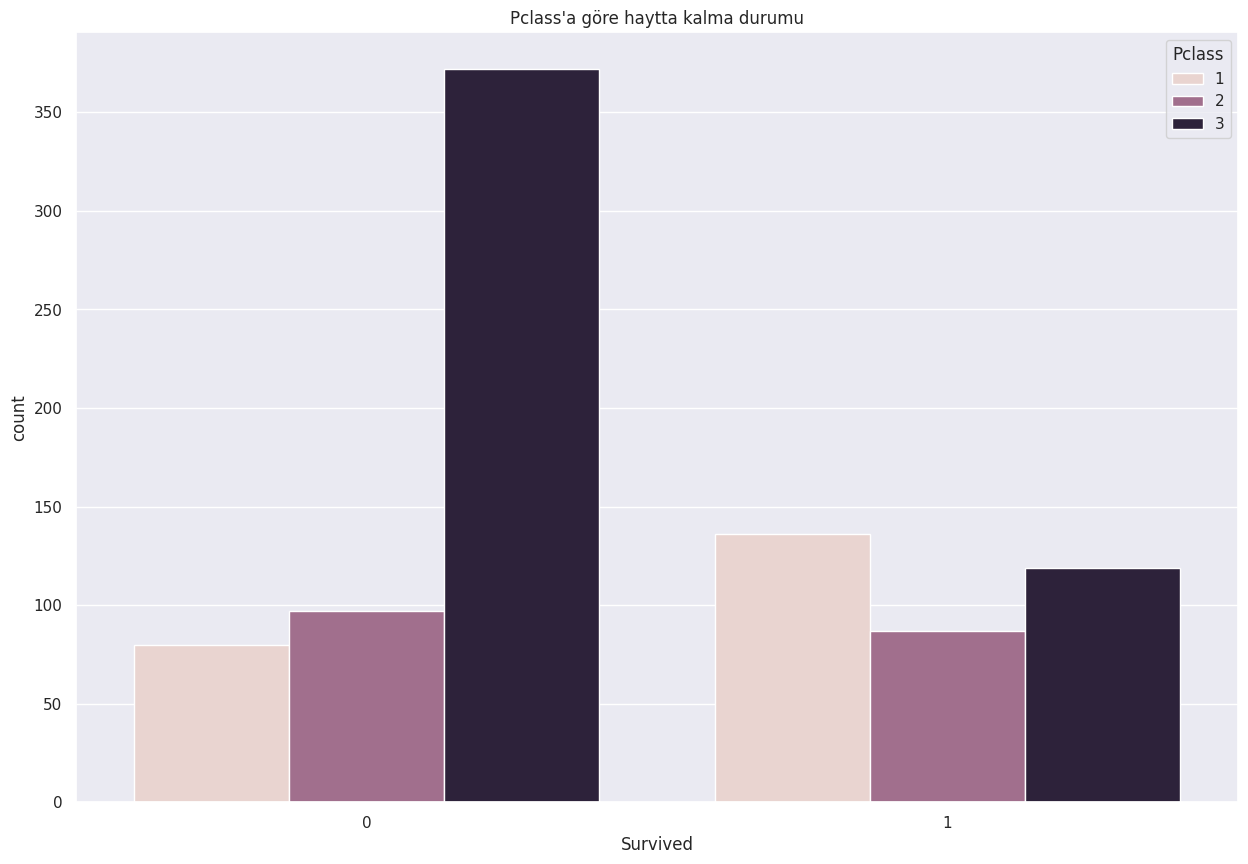

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Pclass'a göre haytta kalma durumu")

#Yaşın Cinsiyet ve Sınıf Bazında Ortalamasının Hesaplanması


In [ ]:
df.groupby(['Sex', 'Pclass'])['Age'].mean().unstack()


Pclass,1,2,3
Sex,,,
female,33.978723,28.703947,23.572917
male,38.995246,30.512315,26.911873


# Korelasyon Isı Haritası

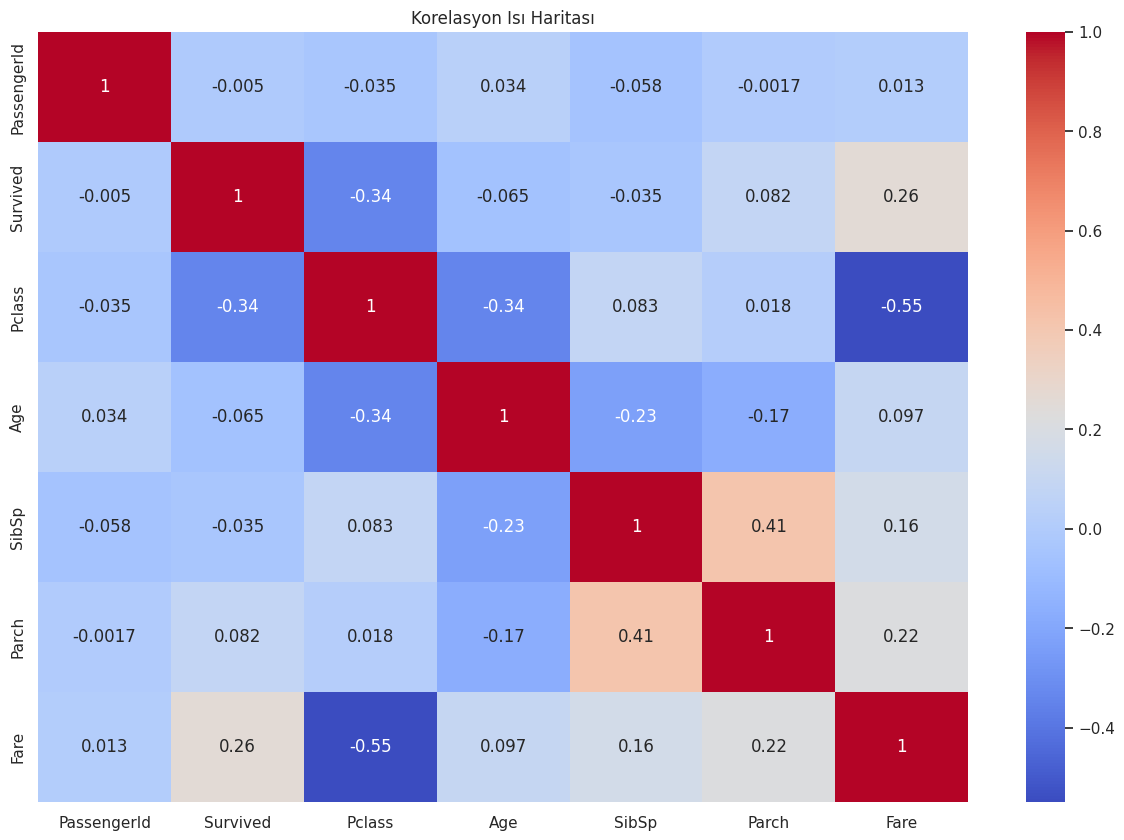

In [ ]:
numerical_df = df.select_dtypes(include=[np.number])

correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Isı Haritası')
plt.show()
